In [1]:
import pymongo
from spearmint.utils import compression
from spearmint.utils import functions
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from spearmint.tasks import input_space
sns.set()

In [2]:
import matlab.engine
import matlab
from scipy import io

In [3]:
sns.set()

In [4]:
case = 0

In [5]:
mat_file = io.loadmat("Spec_CD.mat")

In [54]:
result_file = io.loadmat("test_result.mat")

In [6]:
O_spec = mat_file["GN_spec"]
real_X = mat_file["S_x"]

In [7]:
real_X = real_X[case]
O_spec = O_spec[case]

In [8]:
mongo_conn = pymongo.MongoClient('127.0.0.1',27017)
mongo_conn.list_database_names()

mongo_db = mongo_conn['spearmint']

In [9]:
collection_list = mongo_db.list_collection_names()

In [10]:
exp_name = 'mse_rcwa_case0'

In [11]:
jobs_EI_exp = []
jobs_Mk10_EI_exp = []

recomm_EI_exp = []
recomm_Mk10_EI_exp = []

if "%s_test.jobs"%(exp_name) in collection_list: jobs_EI_exp.append(mongo_db["%s_test.jobs"%(exp_name)])
if "%s_Mk10_EI.jobs"%(exp_name) in collection_list: jobs_Mk10_EI_exp.append(mongo_db["%s_Mk10_EI.jobs"%(exp_name)])
if "%s_test.recommendations"%(exp_name) in collection_list: recomm_EI_exp.append(mongo_db["%s_test.recommendations"%(exp_name)])
if "%s_Mk10_EI.recommendations"%(exp_name) in collection_list: recomm_Mk10_EI_exp.append(mongo_db["%s_Mk10_EI.recommendations"%(exp_name)])
for i in range(1,4):
    if "%s_test-%d.jobs"%(exp_name,i) in collection_list: jobs_EI_exp.append(mongo_db["%s_test-%d.jobs"%(exp_name,i)])
        
    if "%s_test-%d.recommendations"%(exp_name,i) in collection_list: recomm_EI_exp.append(mongo_db["%s_test-%d.recommendations"%(exp_name,i)])

In [29]:
jobs_Mk10_EI_exp[0]

Collection(Database(MongoClient(host=['127.0.0.1:27017'], document_class=dict, tz_aware=False, connect=True), u'spearmint'), u'mse_rcwa_case0_Mk10_EI.jobs')

In [32]:
locs_EI_exp = functions.get_recomm_obs_loc(recomm_EI_exp)
locs_Mk10_EI_exp = functions.get_recomm_obs_loc(recomm_Mk10_EI_exp)

observed_obj_EI_exp = functions.observed_obj(recomm_EI_exp)

In [18]:
real_X

array([  19.37422588,   21.98265885,   24.39183805,   26.94798671,
       1650.50254819])

In [19]:
locs_EI_exp[0][0]

[19.156541128962377,
 19.448503191249145,
 23.835081422697613,
 26.703499705857876,
 1290.908779884152]

In [20]:
real_X - locs_EI_exp[0][0]

array([2.17684749e-01, 2.53415566e+00, 5.56756626e-01, 2.44487001e-01,
       3.59593768e+02])

In [21]:
real_X

array([  19.37422588,   21.98265885,   24.39183805,   26.94798671,
       1650.50254819])

In [22]:
locs_EI_exp[0][499]

[19.333078096259012,
 21.407427777248238,
 24.259984811495386,
 26.78966276426745,
 1657.5963167932055]

In [23]:
def get_abs_error(real_X, locs_exp):
    error_exp = []
    for exp_num in range(len(locs_exp)):
        error_iter = []
        locs_cur_exp = locs_exp[exp_num]
        
        for idx in range(len(locs_cur_exp)):
            error = real_X - locs_cur_exp[idx]
            error = np.abs(error)
            error_iter.append(error)
            
        error_exp.append(error_iter)
    return error_exp

In [24]:
error_EI_exp = get_abs_error(real_X, locs_EI_exp)
error_Mk10_EI_exp = get_abs_error(real_X, locs_Mk10_EI_exp)

In [ ]:
theta1_abs_error = [item[0] for item in error_EI_exp[3]]
theta2_abs_error = [item[1] for item in error_EI_exp[3]]
theta3_abs_error = [item[2] for item in error_EI_exp[3]]
theta4_abs_error = [item[3] for item in error_EI_exp[3]]
theta5_abs_error = [item[4] for item in error_EI_exp[3]]

### Mk10 case

In [ ]:
theta1_Mk10_EI_abs_error = [item[0] for item in error_Mk10_EI_exp[0]]
theta2_Mk10_EI_abs_error = [item[1] for item in error_Mk10_EI_exp[0]]
theta3_Mk10_EI_abs_error = [item[2] for item in error_Mk10_EI_exp[0]]
theta4_Mk10_EI_abs_error = [item[3] for item in error_Mk10_EI_exp[0]]
theta5_Mk10_EI_abs_error = [item[4] for item in error_Mk10_EI_exp[0]]

In [ ]:
sns.set()

In [ ]:
plt.figure()
plt.plot(theta1_abs_error)
plt.show()

In [ ]:
plt.figure()
plt.plot(theta2_abs_error)
plt.show()

In [ ]:
plt.figure()
plt.plot(theta3_abs_error)
plt.show()

In [ ]:
plt.figure()
plt.plot(theta4_abs_error)
plt.show()

In [ ]:
plt.figure()
plt.plot(theta5_abs_error)
plt.show()

In [ ]:
real_X

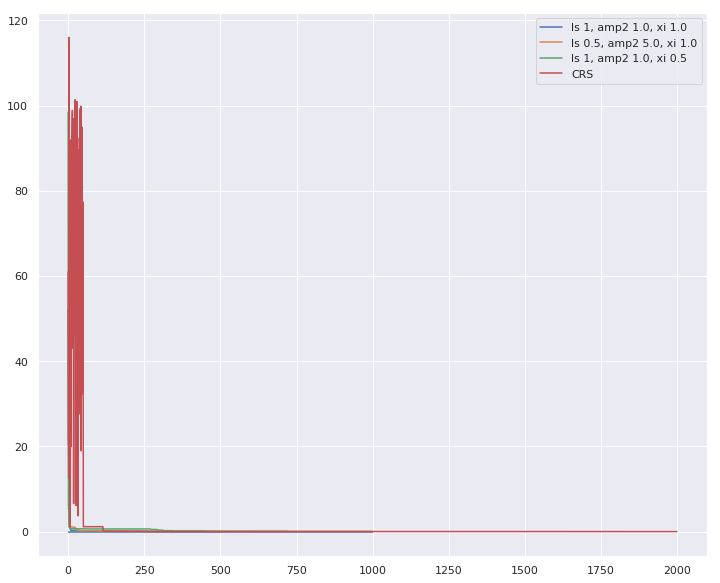

In [74]:
plt.figure(figsize = (12,10))
plt.plot(np.multiply(observed_obj_EI_exp[0], 303), label = "ls 1, amp2 1.0, xi 1.0")
#plt.plot(np.multiply(observed_obj_EI_exp[1], 303), label = "ls 1, amp2 1.0, xi 1.0")
plt.plot(np.multiply(observed_obj_EI_exp[2], 303), label = "ls 0.5, amp2 5.0, xi 1.0")
plt.plot(np.multiply(observed_obj_EI_exp[3], 303), label = "ls 1, amp2 1.0, xi 0.5")
plt.plot(ex_CRS_obj, label='CRS')
#plt.ylim(ymin=0, ymax=1)
plt.hlines(y=0,xmin=0, xmax=1000, color='b')
#plt.vlines(x=100, ymin=0, ymax = 0.5)
plt.legend()
plt.show()

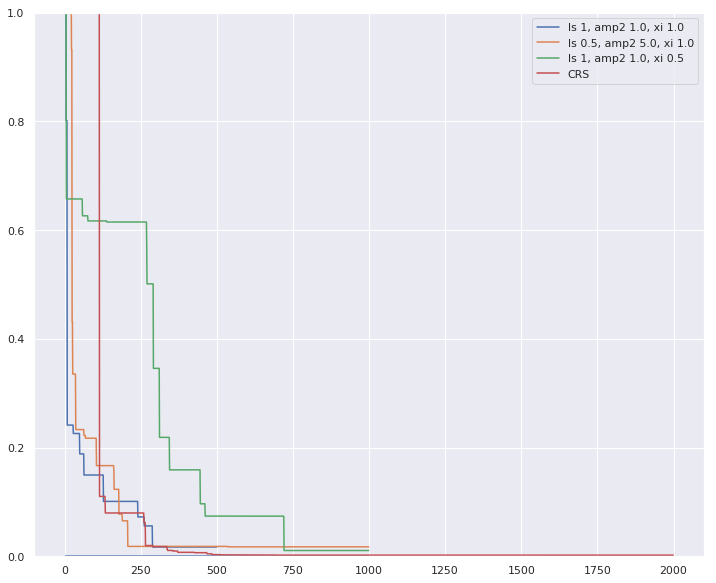

In [75]:
plt.figure(figsize = (12,10))
plt.plot(np.multiply(observed_obj_EI_exp[0], 303), label = "ls 1, amp2 1.0, xi 1.0")
#plt.plot(np.multiply(observed_obj_EI_exp[1], 303), label = "ls 1, amp2 1.0, xi 1.0")
plt.plot(np.multiply(observed_obj_EI_exp[2], 303), label = "ls 0.5, amp2 5.0, xi 1.0")
plt.plot(np.multiply(observed_obj_EI_exp[3], 303), label = "ls 1, amp2 1.0, xi 0.5")
plt.plot(ex_CRS_obj, label='CRS')
plt.ylim(ymin=0, ymax=1)
plt.hlines(y=0,xmin=0, xmax=1000, color='b')
#plt.vlines(x=100, ymin=0, ymax = 0.5)
plt.legend()
plt.show()

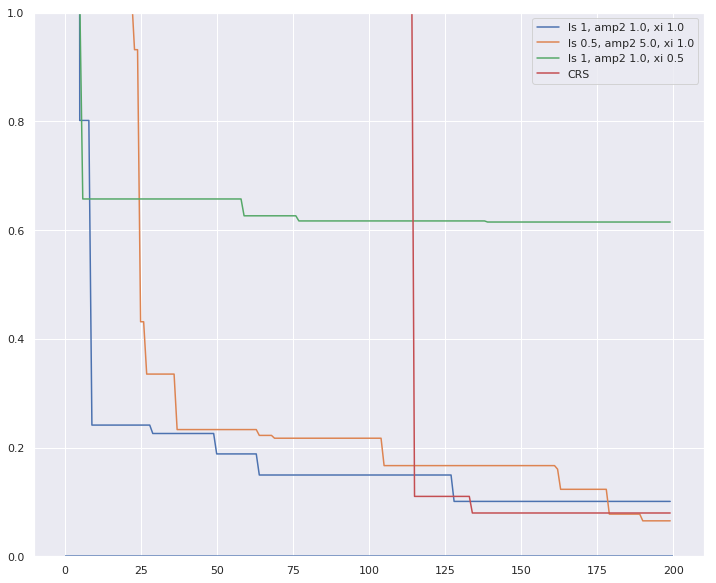

In [80]:
plt.figure(figsize = (12,10))
plt.plot(np.multiply(observed_obj_EI_exp[0][:200], 303), label = "ls 1, amp2 1.0, xi 1.0")
#plt.plot(np.multiply(observed_obj_EI_exp[1], 303), label = "ls 1, amp2 1.0, xi 1.0")
plt.plot(np.multiply(observed_obj_EI_exp[2][:200], 303), label = "ls 0.5, amp2 5.0, xi 1.0")
plt.plot(np.multiply(observed_obj_EI_exp[3][:200], 303), label = "ls 1, amp2 1.0, xi 0.5")
plt.plot(ex_CRS_obj[:200], label='CRS')
plt.ylim(ymin=0, ymax=1)
plt.hlines(y=0,xmin=0, xmax=200, color='b')
#plt.vlines(x=100, ymin=0, ymax = 0.5)
plt.legend()
plt.show()

In [63]:
result_file['result'][0][5]

array([[1.74578497e+01, 2.43894518e+01, 2.45380692e+01, 2.93435877e+01,
        1.71509528e+03, 6.09384289e+01],
       [2.02309752e+01, 2.25075631e+01, 2.17903835e+01, 2.55896216e+01,
        1.49994713e+03, 2.32062199e+01],
       [2.10753800e+01, 2.45502385e+01, 2.41070585e+01, 2.39189749e+01,
        1.40466552e+03, 1.25707344e+01],
       ...,
       [1.94314914e+01, 2.20112261e+01, 2.43222644e+01, 2.67899084e+01,
        1.44485239e+03, 2.15583437e-03],
       [1.94314914e+01, 2.20112261e+01, 2.43222644e+01, 2.67899084e+01,
        1.44485239e+03, 2.15583437e-03],
       [1.94314914e+01, 2.20112261e+01, 2.43222644e+01, 2.67899084e+01,
        1.44485239e+03, 2.15583437e-03]])

In [64]:
ex_CRS_obj = [item[5] for item in result_file['result'][0][5]]

In [65]:
ex_CRS_obj

[60.93842892005294,
 23.20621986199687,
 12.570734405829125,
 115.98171368625873,
 73.67598058539042,
 53.29132309912298,
 1.1476124494201405,
 6.75790209300941,
 33.89113876478136,
 91.94116223740451,
 20.02089801457558,
 89.68586256813121,
 87.17354771668664,
 92.81688365288724,
 98.845854361267,
 43.001061398679035,
 91.55178468469933,
 96.91358152141026,
 6.558586862305784,
 95.11728146853571,
 83.79252307403567,
 46.22220290272105,
 92.44199466825614,
 101.34364132270994,
 88.72106831652637,
 6.100272691216944,
 55.183420767877905,
 89.05343242826021,
 96.48162541059092,
 100.90503919330718,
 84.69629355927756,
 6.0676846315921775,
 81.6102841420852,
 3.6867325796474995,
 89.62630540409113,
 27.55291758447097,
 65.3993786879742,
 92.41622640613788,
 53.229988553408965,
 96.84583770018162,
 99.33040415789108,
 63.90436549566075,
 99.83224618017901,
 18.946040468325172,
 86.9062340991803,
 94.92336584769404,
 88.51683100210631,
 32.37537779636121,
 77.36590424479867,
 50.94892178404